# COGS 108 Final Project

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from pandas.plotting import scatter_matrix

## Group Members

- A13628601 Zeyun Wu
- A14818302 Zhaoyue Xiang
- A14419227 Qian Zhang
- A14534893 Ziteng Wang
- A13370971 Sizhe Qiu
- A92008073 Sizhao Li

## Research Question
### Is the revenue of popular movies in recent ten years propotional to rating on IMDB and MovieLens? How would other related factors affect the prediction of the revenue?

### Hypothesis



The revenue of recent popular movies is propotional to rating on IMDB and MovieLens. The factors such as genres and directors also affect correlation between revenue and rating, thus a multiple regression would make a good prediction for revenue.

### Dataset(s)


- Dataset Name: IMDB data from 2006 to 2016
- Link to the dataset: https://www.kaggle.com/PromptCloudHQ/imdb-data/data
- Number of observations: 1000

Describtion of dataset: It is a dataset of 1000 most popular movies on IMDB, with title, genre, description, director, actors, year, runtime, rating, votes, revenue, and metascore. 


- Dataset Name: MovieLens Latest Dataset
- Link to the dataset: https://grouplens.org/datasets/movielens/latest/
- Number of observations: 26,000,000

Describtion of dataset: 26,000,000 ratings and 750,000 tag applications applied to 45,000 movies by 270,000 users. Includes tag genome data with 12 million relevance scores across 1,100 tags. Last updated 8/2017.

### Data Integration
The MovieLens data set contains seperate ratings by different users to different movies, therefore it is needed to process the date for the use with the observations from the other dataset.<br>
Please Note: as the dataset is large, certain cells might take a long time(couple minutes) to run, but we have already ran it and wrote the result into the file named "integrated_data.csv" for later use.

In [ ]:
# read data sets
df_imdb = pd.read_csv('IMDB-Movie-Data.csv')
df_ML_id = pd.read_csv('movies.csv')
df_ML_rating = pd.read_csv('ratings.csv')

In [ ]:
# return the index of s in l if there is a match
def checkExist(s, l):
    for i in range (0, len(l)):
        if (s in l[i]):
            return i
    return False

In [ ]:
# get title of movies, dropping the old ones (not contained in the imdb data frame)
imdb_title = df_imdb['Title']
df_ML_id[~df_ML_id['title'].str.contains('\(19')]
df_ML_id = df_ML_id.dropna(axis=0, how='any')

In [ ]:
# insert a new column
col_name = df_imdb.columns.tolist()
col_name.insert(1,'ML_id')  
df_imdb = df_imdb.reindex(columns=col_name)
# get the columns
df_ML_id = df_ML_id.reset_index(drop=True)
imdb_titles = df_imdb['Title']

In [ ]:
# add the ML id into the imdb dataframe
for index in range (0, len(imdb_titles)):
    id_index = checkExist(imdb_titles[index], df_ML_id['title'])
    if (id_index != False):
        mvid = df_ML_id.loc[id_index:id_index, 'movieId']
        df_imdb.set_value(index, 'ML_id', mvid)

In [ ]:
# drop nan and insert a column for the ML_score
df_imdb = df_imdb.dropna(axis=0, how='any')
col_name = df_imdb.columns.tolist()
col_name.insert(1,'ML_score')  
df_imdb = df_imdb.reindex(columns=col_name)
# add votes column
col_name = df_imdb.columns.tolist()
col_name.insert(1,'ML_votes')  
df_imdb = df_imdb.reindex(columns=col_name)

In [ ]:
# calculate score
def calculateScore(movie_id, index):
    id_rating= df_ML_rating[df_ML_rating['movieId'] == movie_id]
    id_rating = id_rating.reset_index(drop=True)

    df_imdb.set_value(index,'ML_votes',  len(id_rating))
    
    score_sum = id_rating.sum()['rating']
    score = score_sum/len(id_rating['rating'])
    df_imdb.set_value(index, 'ML_score', score*2)

In [ ]:
df_imdb = df_imdb.reset_index(drop=True)
ML_id = df_imdb['ML_id']
for index in range (0, len(ML_id)):
        calculateScore(ML_id[index], index)

In [ ]:
df_imdb['Overall'] = (df_imdb.ML_score * df_imdb.ML_votes + df_imdb.Rating * df_imdb.Votes) / (df_imdb.Votes+df_imdb.ML_votes)

In [ ]:
df_imdb.to_csv("integrated_data.csv")

### Data Cleaning

In [256]:
df = pd.read_csv("integrated_data.csv")

In [257]:
df = df.drop(["Rank","Description","Director", "Actors", "Description", "Runtime (Minutes)","Unnamed: 0","ML_id"], axis = 1)

In [258]:
df = df.dropna()

In [260]:
def Action_filter(name):
    if "Action" in name:
        result = 1
    else:
        result = 0
        
    return result

def Adventure_filter(name):
    if "Adventure" in name:
        result = 1
    else:
        result = 0
        
    return result

def Comedy_filter(name):
    if "Comedy" in name:
        result = 1
    else:
        result = 0
        
    return result

def Drama_filter(name):
    if "Drama" in name:
        result = 1
    else:
        result = 0
        
    return result

def Biography_filter(name):
    if "Biography" in name:
        result = 1
    else:
        result = 0
        
    return result

def Fantasy_filter(name):
    if "Fantasy" in name:
        result = 1
    else:
        result = 0
        
    return result

def Horror_filter(name):
    if "Horror" in name:
        result = 1
    else:
        result = 0
        
    return result

def Mystery_filter(name):
    if "Mystery" in name:
        result = 1
    else:
        result = 0
        
    return result

def Romance_filter(name):
    if "Romance" in name:
        result = 1
    else:
        result = 0
        
    return result

def Scifi_filter(name):
    if "Sci-Fi" in name:
        result = 1
    else:
        result = 0
        
    return result

def Crime_filter(name):
    if "Crime" in name:
        result = 1
    else:
        result = 0
        
    return result

def Thriller_filter(name):
    if "Thriller" in name:
        result = 1
    else:
        result = 0
        
    return result


In [261]:
df['Action'] = df['Genre'].apply(Action_filter) 
df['Adventure'] = df['Genre'].apply(Adventure_filter) 
df['Biography'] = df['Genre'].apply(Biography_filter) 
df['Comedy'] = df['Genre'].apply(Comedy_filter) 
df['Crime'] = df['Genre'].apply(Crime_filter) 
df['Drama'] = df['Genre'].apply(Drama_filter) 
df['Fantasy'] = df['Genre'].apply(Fantasy_filter) 
df['Horror'] = df['Genre'].apply(Horror_filter) 
df['Mystery'] = df['Genre'].apply(Mystery_filter) 
df['Romance'] = df['Genre'].apply(Romance_filter) 
df['Sci-Fi'] = df['Genre'].apply(Scifi_filter) 
df['Thriller'] = df['Genre'].apply(Thriller_filter) 

In [262]:
df

,ML_votes,ML_score,Title,Genre,Year,Rating,Votes,Revenue (Millions),Metascore,Overall,...,Biography,Comedy,Crime,Drama,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller
0,12183.0,7.855536,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,8.1,757074,333.13,76.0,8.096128,...,0,0,0,0,0,0,0,0,1,0
1,6139.0,6.748493,Prometheus,"Adventure,Mystery,Sci-Fi",2012,7.0,485820,126.46,65.0,6.996862,...,0,0,0,0,0,0,1,0,1,0
2,174.0,6.000000,Split,"Horror,Thriller",2016,7.3,157606,138.12,62.0,7.298566,...,0,0,0,0,0,1,0,0,0,1
3,12416.0,8.055171,Sing,"Animation,Comedy,Family",2016,7.2,60545,270.32,59.0,7.345527,...,0,1,0,0,0,0,0,0,0,0
4,1805.0,5.765097,Suicide Squad,"Action,Adventure,Fantasy",2016,6.2,393727,325.02,40.0,6.198015,...,0,0,0,0,1,0,0,0,0,0
5,225.0,6.155556,The Great Wall,"Action,Adventure,Fantasy",2016,6.1,56036,45.13,42.0,6.100222,...,0,0,0,0,1,0,0,0,0,0
6,1847.0,7.642664,La La Land,"Comedy,Drama,Music",2016,8.3,258682,151.06,93.0,8.295340,...,0,1,0,1,0,0,0,0,0,0
7,82.0,6.109756,The Lost City of Z,"Action,Adventure,Biography",2016,7.1,7188,8.01,78.0,7.088831,...,1,0,0,0,0,0,0,0,0,0
8,221.0,5.927602,Passengers,"Adventure,Drama,Romance",2016,7.0,192177,100.01,41.0,6.998768,...,0,0,0,1,0,0,0,1,0,0
9,1709.0,7.407841,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",2016,7.5,232072,234.02,66.0,7.499326,...,0,0,0,0,1,0,0,0,0,0


### Data Analysis & Visualization

In [263]:
df1 = df['Genre'].str.split(',', expand = True)

In [264]:
df['Genre1'] = df1[0]
df['Genre2'] = df1[1]
df['Genre3'] = df1[2]

In [265]:
df = df.reset_index(drop = True)
df = df.drop(['Genre'], axis = 1)

In [266]:
dict_1 ={} 
for index, row in df.iterrows():
    if dict_1.__contains__(row['Genre1']):
        result = dict_1[row['Genre1']]
        dict_1[row['Genre1']] = result + 1
    else:
        dict_1[row['Genre1']] = 1

for index, row in df.iterrows():
    if dict_1.__contains__(row['Genre2']):
        result = dict_1[row['Genre2']]
        dict_1[row['Genre2']] = result + 1
    else:
        dict_1[row['Genre2']] = 1
        
for index, row in df.iterrows():
    if dict_1.__contains__(row['Genre3']):
        result = dict_1[row['Genre3']]
        dict_1[row['Genre3']] = result + 1
    else:
        dict_1[row['Genre3']] = 1

In [267]:
dict_1

{'Action': 245,
 'Adventure': 219,
 'Horror': 71,
 'Animation': 41,
 'Comedy': 218,
 'Biography': 57,
 'Drama': 351,
 'Crime': 111,
 'Mystery': 70,
 'Sci-Fi': 95,
 'Fantasy': 75,
 'Thriller': 125,
 'Family': 46,
 None: 266,
 'Romance': 101,
 'History': 23,
 'Music': 14,
 'Western': 4,
 'War': 9,
 'Musical': 5,
 'Sport': 14}

In [268]:
del dict_1[None]

In [269]:
for key, value in list(dict_1.items()):
    if value < 50:
        del dict_1[key]

In [270]:
dict_1 = sorted(dict_1.items(), key = lambda item:item[1] , reverse = True )
dict_1

[('Drama', 351),
 ('Action', 245),
 ('Adventure', 219),
 ('Comedy', 218),
 ('Thriller', 125),
 ('Crime', 111),
 ('Romance', 101),
 ('Sci-Fi', 95),
 ('Fantasy', 75),
 ('Horror', 71),
 ('Mystery', 70),
 ('Biography', 57)]

In [271]:
df_Action = df[(df['Genre1']=='Action') | (df['Genre2']=='Action')| (df['Genre3'] == 'Action')]
df_Drama = df[(df['Genre1']=='Drama') | (df['Genre2']=='Drama')| (df['Genre3'] == 'Drama')]
df_Comedy = df[(df['Genre1']=='Comedy') | (df['Genre2']=='Comedy')| (df['Genre3'] == 'Comedy')]
df_Adventure = df[(df['Genre1']=='Adventure') | (df['Genre2']=='Adventure')| (df['Genre3'] == 'Adventure')]
df_Thriller = df[(df['Genre1']=='Thriller') | (df['Genre2']=='Thriller')| (df['Genre3'] == 'Thriller')]
df_Crime = df[(df['Genre1']=='Crime') | (df['Genre2']=='Crime')| (df['Genre3'] == 'Crime')]
df_Romance = df[(df['Genre1']=='Romance') | (df['Genre2']=='Romance')| (df['Genre3'] == 'Romance')]
df_SciFi = df[(df['Genre1']=='Sci-Fi') | (df['Genre2']=='Sci-Fi')| (df['Genre3'] == 'Sci-Fi')]
df_Fantasy = df[(df['Genre1']=='Fantasy') | (df['Genre2']=='Fantasy')| (df['Genre3'] == 'Fantasy')]
df_Horror = df[(df['Genre1']=='Horror') | (df['Genre2']=='Horror')| (df['Genre3'] == 'Horror')]
df_Mystery = df[(df['Genre1']=='Mystery') | (df['Genre2']=='Mystery')| (df['Genre3'] == 'Mystery')]
df_Biography = df[(df['Genre1']=='Biography') | (df['Genre2']=='Biography')| (df['Genre3'] == 'Biography')]

In [272]:
df.columns = ["ML_votes","ML_score","Title",  "Year", "IMDB_Rating", "IMDB_votes",
              "Revenue", "Metascore","Average_Rating",'Action','Adventure','Biography',
             'Comedy','Crime','Drama','Fantasy','Horror','Mystery','Romance','SciFi','Thriller',"Genre1","Genre2","Genre3"]

In [273]:
df["Total_Votes"]=df["IMDB_votes"]+df["ML_votes"]
df

,ML_votes,ML_score,Title,Year,IMDB_Rating,IMDB_votes,Revenue,Metascore,Average_Rating,Action,...,Fantasy,Horror,Mystery,Romance,SciFi,Thriller,Genre1,Genre2,Genre3,Total_Votes
0,12183.0,7.855536,Guardians of the Galaxy,2014,8.1,757074,333.13,76.0,8.096128,1,...,0,0,0,0,1,0,Action,Adventure,Sci-Fi,769257.0
1,6139.0,6.748493,Prometheus,2012,7.0,485820,126.46,65.0,6.996862,0,...,0,0,1,0,1,0,Adventure,Mystery,Sci-Fi,491959.0
2,174.0,6.000000,Split,2016,7.3,157606,138.12,62.0,7.298566,0,...,0,1,0,0,0,1,Horror,Thriller,None,157780.0
3,12416.0,8.055171,Sing,2016,7.2,60545,270.32,59.0,7.345527,0,...,0,0,0,0,0,0,Animation,Comedy,Family,72961.0
4,1805.0,5.765097,Suicide Squad,2016,6.2,393727,325.02,40.0,6.198015,1,...,1,0,0,0,0,0,Action,Adventure,Fantasy,395532.0
5,225.0,6.155556,The Great Wall,2016,6.1,56036,45.13,42.0,6.100222,1,...,1,0,0,0,0,0,Action,Adventure,Fantasy,56261.0
6,1847.0,7.642664,La La Land,2016,8.3,258682,151.06,93.0,8.295340,0,...,0,0,0,0,0,0,Comedy,Drama,Music,260529.0
7,82.0,6.109756,The Lost City of Z,2016,7.1,7188,8.01,78.0,7.088831,1,...,0,0,0,0,0,0,Action,Adventure,Biography,7270.0
8,221.0,5.927602,Passengers,2016,7.0,192177,100.01,41.0,6.998768,0,...,0,0,0,1,0,0,Adventure,Drama,Romance,192398.0
9,1709.0,7.407841,Fantastic Beasts and Where to Find Them,2016,7.5,232072,234.02,66.0,7.499326,0,...,1,0,0,0,0,0,Adventure,Family,Fantasy,233781.0


In [274]:
f= "Revenue~Average_Rating"
[outcome_1,predictors_1]=patsy.dmatrices(f,df)
mod_1=sm.OLS(outcome_1,predictors_1)
res_1=mod_1.fit()

In [275]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     43.91
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           6.74e-11
Time:                        13:51:03   Log-Likelihood:                -4346.9
No. Observations:                 720   AIC:                             8698.
Df Residuals:                     718   BIC:                             8707.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -115.4539     30.521     -3.

In [276]:
f= "Revenue~Average_Rating+Metascore"
[outcome_2,predictors_2]=patsy.dmatrices(f,df)
mod_2=sm.OLS(outcome_2,predictors_2)
res_2=mod_2.fit()

In [277]:
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     22.02
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           5.22e-10
Time:                        13:51:05   Log-Likelihood:                -4346.8
No. Observations:                 720   AIC:                             8700.
Df Residuals:                     717   BIC:                             8713.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -111.1754     32.127     -3.

Reject Metascore

In [278]:
f= "Revenue~Average_Rating+Total_Votes"
[outcome_3,predictors_3]=patsy.dmatrices(f,df)
mod_3=sm.OLS(outcome_3,predictors_3)
res_3=mod_3.fit()

In [279]:
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     251.1
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           2.28e-83
Time:                        13:51:07   Log-Likelihood:                -4177.2
No. Observations:                 720   AIC:                             8360.
Df Residuals:                     717   BIC:                             8374.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        112.4692     26.505      4.

In [280]:
f= "Revenue~Average_Rating+Total_Votes+Action+Adventure+Biography+Comedy+Crime+Drama+Fantasy+Horror+Mystery+Romance+SciFi+Thriller"
[outcome_4,predictors_4]=patsy.dmatrices(f,df)
mod_4=sm.OLS(outcome_4,predictors_4)
res_4=mod_4.fit()

In [281]:
print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     57.06
Date:                Thu, 15 Mar 2018   Prob (F-statistic):          6.81e-106
Time:                        13:51:08   Log-Likelihood:                -4095.6
No. Observations:                 720   AIC:                             8221.
Df Residuals:                     705   BIC:                             8290.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         52.4982     29.091      1.

In [282]:
#-1.4642*df["Average_Rating"]-2.4424*df["Action"]-0.6632*df["Biography"]-2.3503*df["Comedy"]-11.7751*df["Crime"]
#+ 8.9527*df["Fantasy"]-18.7439*df["Horror"]-14.2948*df["Romance"]-11.5951*df["SciFi"]-10.008*df["Thriller"]

we reject Average_Rating,Action,Biography,Comedy,Crime,Fantasy,Horror,Romance,SciFi,Thriller

In [283]:
f= "Revenue~Total_Votes+Adventure+Drama+Mystery"
[outcome_5,predictors_5]=patsy.dmatrices(f,df)
mod_5=sm.OLS(outcome_5,predictors_5)
res_5=mod_5.fit()

In [284]:
print(res_5.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     196.6
Date:                Thu, 15 Mar 2018   Prob (F-statistic):          1.24e-113
Time:                        13:51:11   Log-Likelihood:                -4101.2
No. Observations:                 720   AIC:                             8212.
Df Residuals:                     715   BIC:                             8235.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      29.8315      5.578      5.348      

In [285]:
df["Predicted_Revenue"]=29.8315+0.0003*df["Total_Votes"]+55.1964*df["Adventure"]-34.1670*df["Drama"]-28.2406*df["Mystery"]

df

,ML_votes,ML_score,Title,Year,IMDB_Rating,IMDB_votes,Revenue,Metascore,Average_Rating,Action,...,Horror,Mystery,Romance,SciFi,Thriller,Genre1,Genre2,Genre3,Total_Votes,Predicted_Revenue
0,12183.0,7.855536,Guardians of the Galaxy,2014,8.1,757074,333.13,76.0,8.096128,1,...,0,0,0,1,0,Action,Adventure,Sci-Fi,769257.0,315.8050
1,6139.0,6.748493,Prometheus,2012,7.0,485820,126.46,65.0,6.996862,0,...,0,1,0,1,0,Adventure,Mystery,Sci-Fi,491959.0,204.3750
2,174.0,6.000000,Split,2016,7.3,157606,138.12,62.0,7.298566,0,...,1,0,0,0,1,Horror,Thriller,None,157780.0,77.1655
3,12416.0,8.055171,Sing,2016,7.2,60545,270.32,59.0,7.345527,0,...,0,0,0,0,0,Animation,Comedy,Family,72961.0,51.7198
4,1805.0,5.765097,Suicide Squad,2016,6.2,393727,325.02,40.0,6.198015,1,...,0,0,0,0,0,Action,Adventure,Fantasy,395532.0,203.6875
5,225.0,6.155556,The Great Wall,2016,6.1,56036,45.13,42.0,6.100222,1,...,0,0,0,0,0,Action,Adventure,Fantasy,56261.0,101.9062
6,1847.0,7.642664,La La Land,2016,8.3,258682,151.06,93.0,8.295340,0,...,0,0,0,0,0,Comedy,Drama,Music,260529.0,73.8232
7,82.0,6.109756,The Lost City of Z,2016,7.1,7188,8.01,78.0,7.088831,1,...,0,0,0,0,0,Action,Adventure,Biography,7270.0,87.2089
8,221.0,5.927602,Passengers,2016,7.0,192177,100.01,41.0,6.998768,0,...,0,0,1,0,0,Adventure,Drama,Romance,192398.0,108.5803
9,1709.0,7.407841,Fantastic Beasts and Where to Find Them,2016,7.5,232072,234.02,66.0,7.499326,0,...,0,0,0,0,0,Adventure,Family,Fantasy,233781.0,155.1622


Text(0,0.5,'Revenue(Million)')

<Figure size 432x288 with 0 Axes>

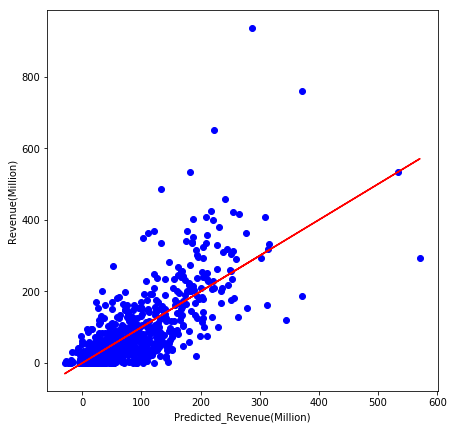

In [286]:
plt.figure(1)
plt.figure(figsize=(7,7))
m=df['Predicted_Revenue']
n=df['Revenue']

plt.plot(m,n,'bo',x,x,'r-')
plt.xlabel('Predicted_Revenue(Million)')
plt.ylabel('Revenue(Million)')

In [287]:
f= "Revenue~Predicted_Revenue"
[outcome_6,predictors_6]=patsy.dmatrices(f,df)
mod_6=sm.OLS(outcome_6,predictors_6)
res_6=mod_6.fit()

In [288]:
print(res_6.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     789.7
Date:                Thu, 15 Mar 2018   Prob (F-statistic):          8.91e-118
Time:                        13:51:15   Log-Likelihood:                -4101.2
No. Observations:                 720   AIC:                             8206.
Df Residuals:                     718   BIC:                             8216.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0074      4.05

In [289]:
#function to produce dataframe for plotting
#for each genre, the dataframe contains a column of years and a column of average revenue in that year
def year_average_revenue(df_genre):
    dict_genre = {}
    for years in range (2006, 2017):
        for index, row in df_genre.iterrows():
            if dict_genre.__contains__(row['Year']):
                continue
            else:
                dict_genre[years] = sum(df_genre[df['Year'] == years]['Revenue (Millions)'])/df_genre[df['Year']==years].shape[0]
    df_output = pd.DataFrame(list(dict_genre.items()), columns = ['year', 'aver_revenue'])
    return df_output

In [290]:
#call year_average_revenue to produce plotting dataframes for each genre
action = year_average_revenue(df_Action)
drama = year_average_revenue(df_Drama)
adventure = year_average_revenue(df_Adventure)
comedy = year_average_revenue(df_Comedy)
thriller = year_average_revenue(df_Thriller)
crime = year_average_revenue(df_Crime)
romance = year_average_revenue(df_Romance)
scifi = year_average_revenue(df_SciFi)
fantasy = year_average_revenue(df_Fantasy)
horror = year_average_revenue(df_Horror)
mystery = year_average_revenue(df_Mystery)
biography = year_average_revenue(df_Biography)

C:\Users\siq00\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


C:\Users\siq00\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The hold function was deprecated in version 2.0.
  import sys


Text(0,0.5,'Average Revenue(Million)')

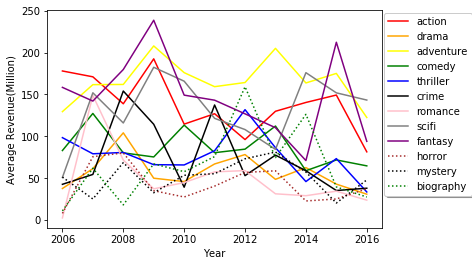

In [291]:
#genre-revenue among years
fig = plt.figure(1)
x=action['year']
y=action['aver_revenue']
plt.plot(x,y,'r-',color = 'red', label = 'action')

fig.hold()

#continue for all other popular genres
x=drama['year']
y=drama['aver_revenue']
plt.plot(x,y,'r-', color = 'orange', label = 'drama')

x=adventure['year']
y=adventure['aver_revenue']
plt.plot(x,y,'r-', color = 'yellow', label = 'adventure')

x=comedy['year']
y=comedy['aver_revenue']
plt.plot(x,y,'r-', color = 'green', label = 'comedy')

x=thriller['year']
y=thriller['aver_revenue']
plt.plot(x,y,'r-', color = 'blue', label = 'thriller')

x=crime['year']
y=crime['aver_revenue']
plt.plot(x,y,'r-', color = 'black', label = 'crime')

x=romance['year']
y=romance['aver_revenue']
plt.plot(x,y,'r-', color = 'pink', label = 'romance')

x=scifi['year']
y=scifi['aver_revenue']
plt.plot(x,y,'r-', color = 'gray', label = 'scifi')

x=fantasy['year']
y=fantasy['aver_revenue']
plt.plot(x,y,'r-', color = 'purple', label = 'fantasy')

x=horror['year']
y=horror['aver_revenue']
plt.plot(x,y,'r-', color = 'brown',ls = 'dotted', label = 'horror')

x=mystery['year']
y=mystery['aver_revenue']
plt.plot(x,y,'r-', color = 'black',ls = 'dotted', label = 'mystery')

x=biography['year']
y=biography['aver_revenue']
plt.plot(x,y,'r-', color = 'green',ls = 'dotted', label = 'biography')

legend = fig.legend(bbox_to_anchor=(0.89, 0.88), loc=2, borderaxespad=0., shadow=True)
plt.xlabel('Year')
plt.ylabel('Average Revenue(Million)')

Text(0,0.5,'Revenue(Million)')

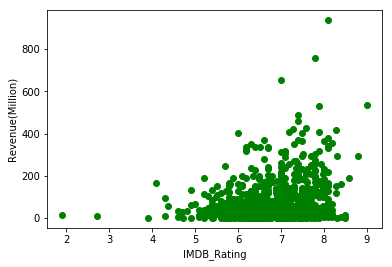

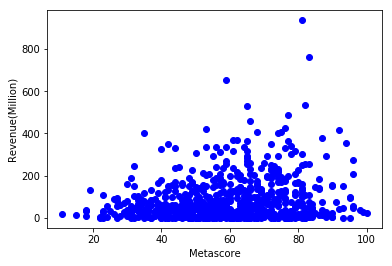

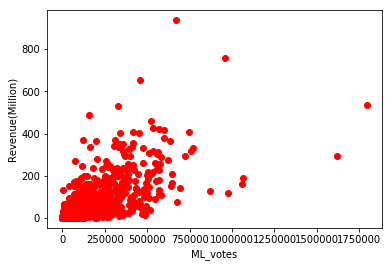

In [293]:
plt.figure(1)
x=df['Average_Rating']
y=df['Revenue']
plt.plot(x,y,'go')
plt.xlabel('Average_Rating')
plt.ylabel('Revenue(Million)')

plt.figure(2)
x=df['Metascore']
y=df['Revenue']
plt.plot(x,y,'bo')
plt.xlabel('Metascore')
plt.ylabel('Revenue(Million)')



plt.figure(3)
x=df['Total_Votes']
y=df['Revenue']
plt.plot(x,y,'ro')
plt.xlabel('ML_votes')
plt.ylabel('Revenue(Million)')



### Discussion



### Review